In [1]:
# In this exercise, we will do a true non-linear regression.
# The data shows China's GDP from 1960 to 2014.

# Reading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


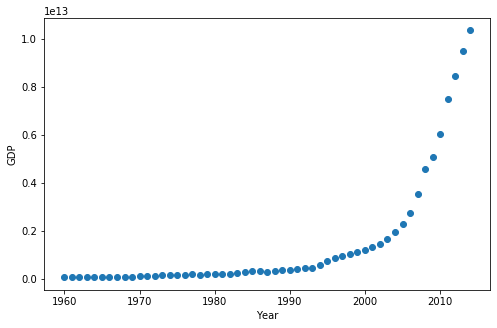

In [6]:
# Visualizing data

plt.figure(figsize=(8, 5))
plt.scatter(df.Year, df.Value)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In this point, we will chose Logistic Regression since since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end.

#### The formula for Logistic Regression
#### Y = 1 / (1 + e^(ß1(x - ß2)))
- ß1: Controls the curve's steepness
- ß2: Slides the curve on the x-axis.

In [8]:
# Before starting, we need to normalize our data
x_norm = df["Year"].values / df["Year"].values.max()
y_norm = df["Value"].values / df["Value"].values.max()

Now, we need to find the best parameters for our model.

We can use **curve_fit** which uses non-linear least squares to fit our sigmoid function.

**Optimization:** Sum of the squared residuals of sigmoid(x_norm, *popt) - y_norm must be minimized.
(popt are our optimized parameters)

In [10]:
from scipy.optimize import curve_fit

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
# Print final parameters
print("ß1: {}, ß2: {}".format(popt[0], popt[1]))

ß1: 690.4517109968472, ß2: 0.9972071272536187


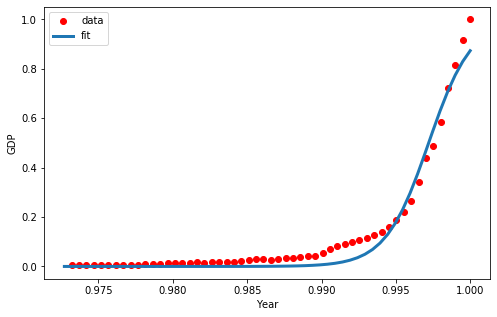

In [12]:
# Visualizing what we have done

x = np.linspace(1960, 2015, 55)
x /= max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()